In [ ]:
# Lab 4: Write a Python program to perform the following operations on Iris dataset

In [ ]:
#1. Load the dataset
# a. Import the Iris dataset (from sklearn.datasets). b. Convert it into a Pandas DataFrame with column names.

In [ ]:
from sklearn.datasets import load_iris



In [ ]:
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.head())


   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]


In [ ]:
#2. Univariate visualization
#a. Draw histograms for each feature (sepal length, sepal width, petal length, petal width).
# b. Use different colors and add axis labels + titles.

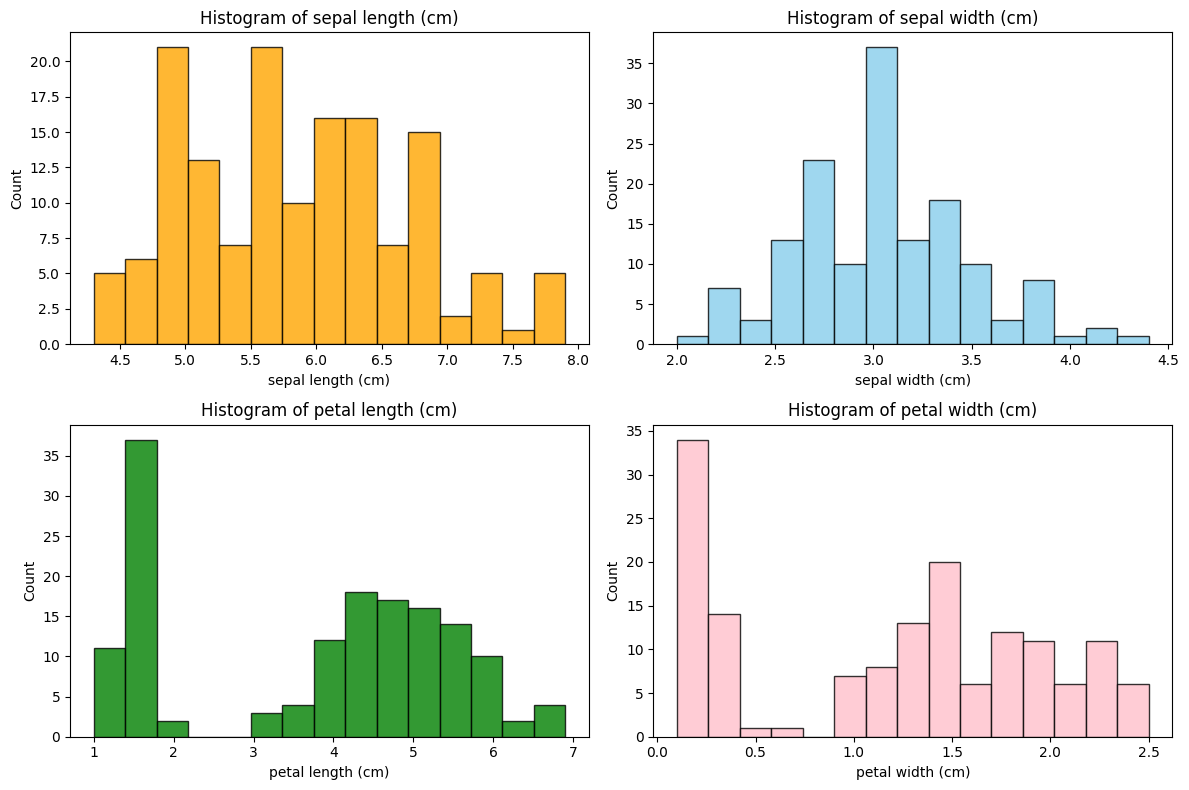

In [ ]:
import matplotlib.pyplot as plt
features = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)'
]
colors = ['orange','skyblue', 'green', 'pink']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, (feat, color) in enumerate(zip(features, colors)):
    axes[idx].hist(df[feat], bins=15, color=color, edgecolor='black', alpha=0.8)
    axes[idx].set_title(f'Histogram of {feat}', fontsize=12)
    axes[idx].set_xlabel(feat)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()


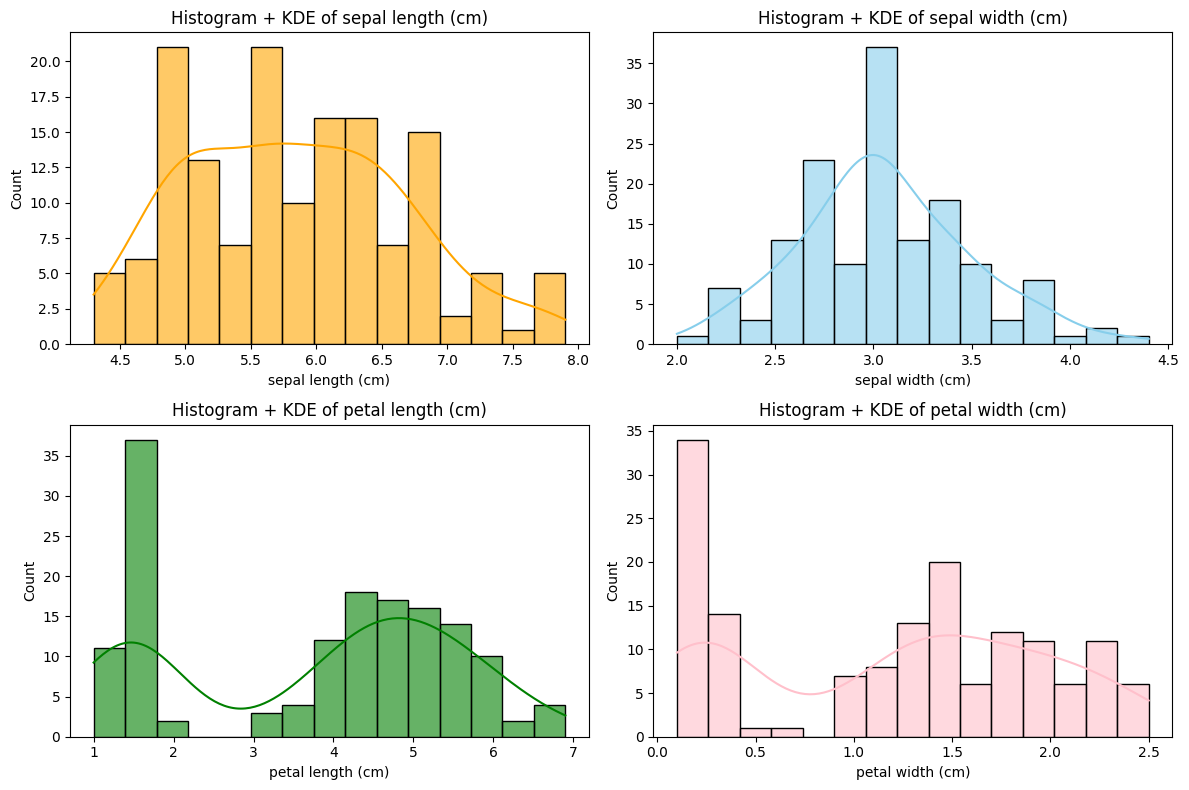

In [ ]:
import seaborn as sns
features = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)'
]
colors = ['orange','skyblue', 'green', 'pink']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, feat, color in zip(axes, features, colors):
    sns.histplot(data=df, x=feat, bins=15, kde=True, ax=ax, color=color, edgecolor='black', alpha=0.6)
    ax.set_title(f'Histogram + KDE of {feat}', fontsize=12)
    ax.set_xlabel(feat)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
#3. Bivariate visualization
#a. Create a scatter plot of sepal length vs sepal width, with different colors for each species.
# b. Create another scatter plot of petal length vs petal width, again color-coded by species.

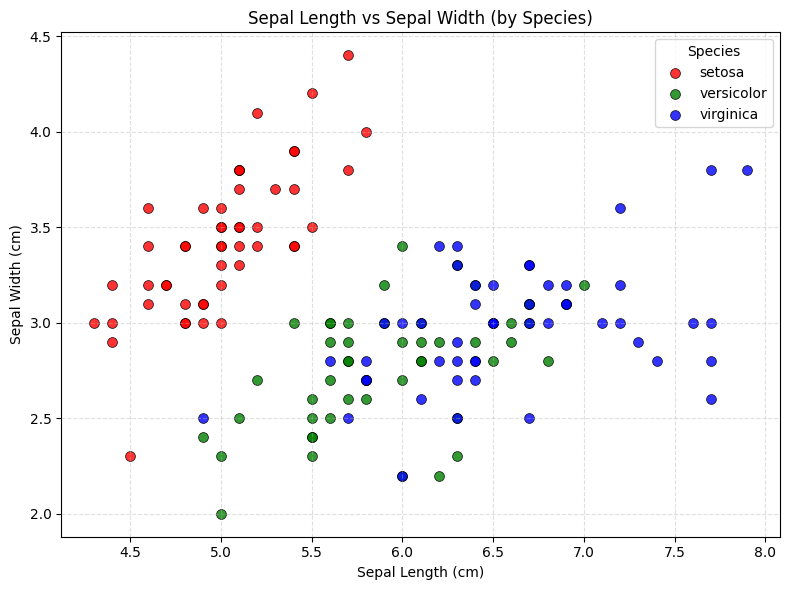

In [ ]:

plt.figure(figsize=(8, 6))
species = df['species'].cat.categories
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for spec in species:
    subset = df[df['species'] == spec]
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        label=spec,
        color=colors[spec],
        s=50,
        alpha=0.8,
        edgecolors='black',
        linewidths=0.6
    )

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width (by Species)')
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


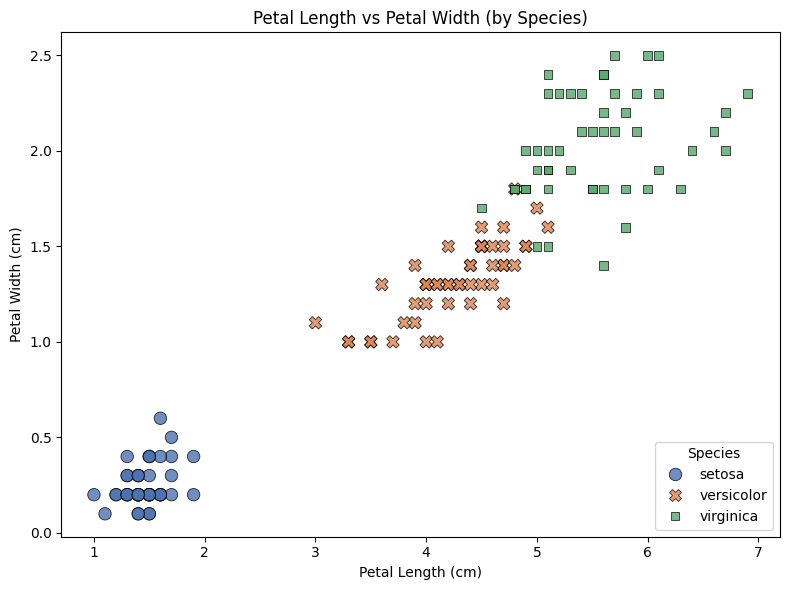

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    style='species',
    s=80,
    alpha=0.8,
    palette='deep',
    edgecolor='black',
    linewidth=0.6
)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width (by Species)')
plt.legend(title='Species', loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
#4. Category-based visualization
#a. Create a boxplot of petal length grouped by species.
#b. Create a violin-style plot approximation using boxplot + scatter

/tmp/ipython-input-1359341825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


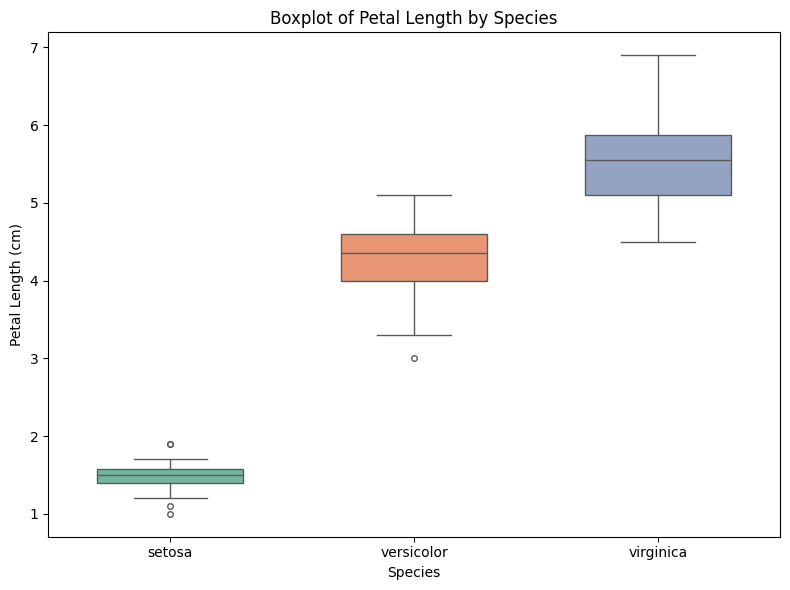

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x='species',
    y='petal length (cm)',
    palette='Set2',
    width=0.6,
    fliersize=4
)

plt.title("Boxplot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-659827024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


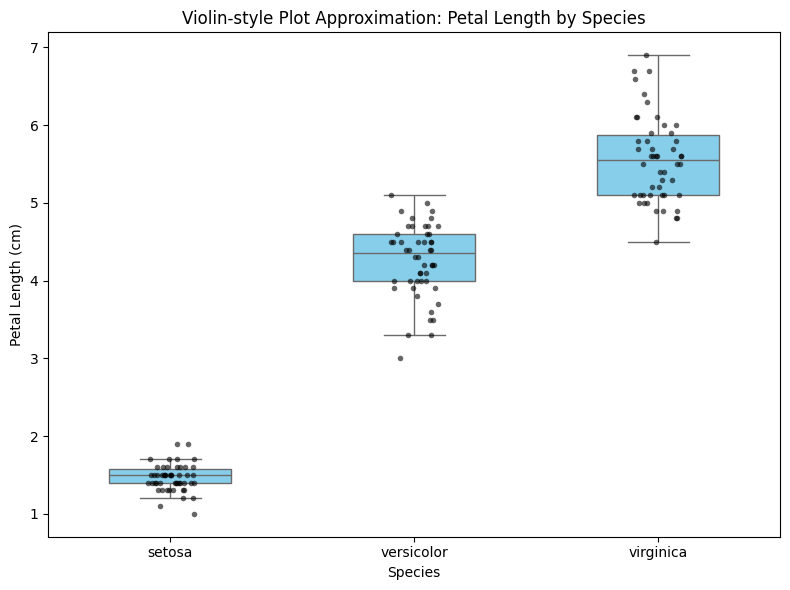

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x='species',
    y='petal length (cm)',
    palette='Set3',
    width=0.5,
    showcaps=True,
    boxprops={'facecolor':'skyblue'},
    showfliers=False
)
sns.stripplot(
    data=df,
    x='species',
    y='petal length (cm)',
    color='black',
    size=4,
    jitter=True,
    alpha=0.6
)

plt.title("Violin-style Plot Approximation: Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.show()


In [ ]:
#5. Correlation visualization a. Compute the correlation matrix of the features.
#b. Visualize it using a heatmap with Matplotlib.

In [ ]:
import pandas as pd
features_df = df.drop(columns=['species'])

corr_matrix = features_df.corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.817941
sepal width (cm)           -0.117570  ...         -0.366126
petal length (cm)           0.871754  ...          0.962865
petal width (cm)            0.817941  ...          1.000000

[4 rows x 4 columns]


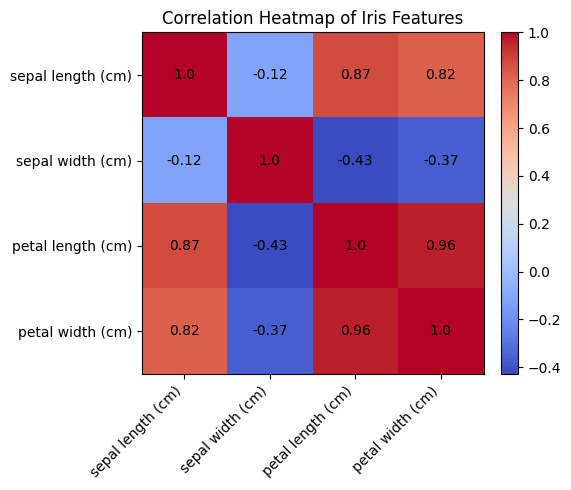

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 5))

im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

plt.colorbar(im, fraction=0.046, pad=0.04)

plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = round(corr_matrix.iloc[i, j], 2)
        plt.text(j, i, str(value), ha='center', va='center', color='black')

plt.title("Correlation Heatmap of Iris Features")
plt.tight_layout()
plt.show()
